In [19]:
# Librerias
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import random
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt


#### Ejercicio 1  Si una red neuronal para detectar si una radiografía es de un tórax ha predicho lo siguiente:

    - Para 13 radiografías que eran de tórax , en 8 ha dicho que era un tórax y en 5 ha dicho que no lo era.
    - Para 7 radiografías que no eran un tórax , en 4 ha dicho que no era un tórax y en 3 ha dicho que lo era.

Indica el nº de:

    - Verdaderos Positivos (TP)
    - Verdaderos Negativos (TN)
    - Falsos Positivos (FP)
    - Falsos Negativos (FN)

Dibuja la matriz de confusion

```markdown
| Predicción | Realidad | Cantidad |
|------------|----------|----------|
| TP         | Tórax    | 8        |
| FP         | No Tórax | 3        |
| FN         | Tórax    | 5        |
| TN         | No Tórax | 4        |
```

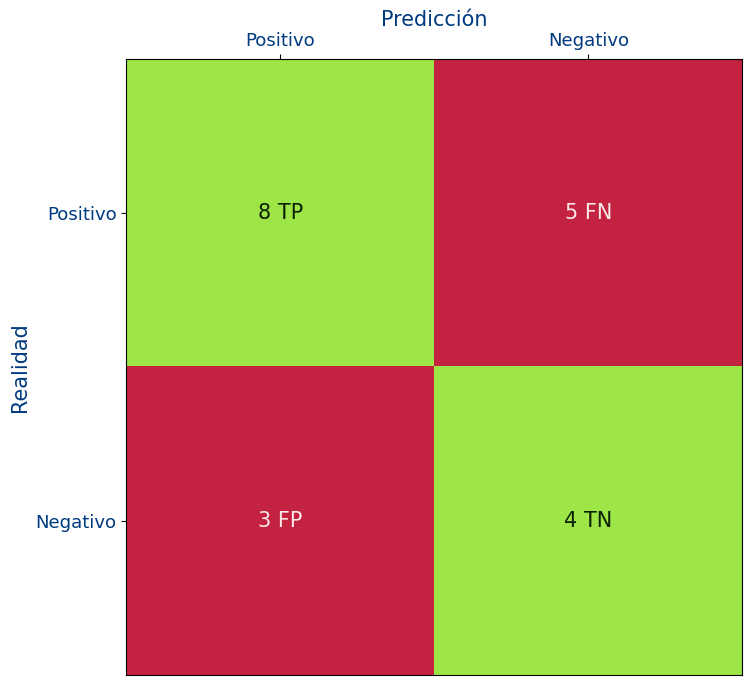

In [20]:
# Crear una figura y un objeto de ejes
fig, ax = plt.subplots(figsize=(8, 8))  # Configura el tamaño de la figura

# Llamar a la función pasando el objeto `ax` como `axes`
plot_matriz_confusion(
    axes=ax,
    TP=8, TN=4, FP=3, FN=5,
    fontsize=15
)

# Mostrar el gráfico
plt.show()

#### Ejercicio 2.A Seguimos con la red neuronal que predice si una radiografía es de tórax.
#### Si para 10 imágenes ha sacado los siguientes resultados:

**y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])**

#### Indica para cada valor predicho , si ha predicho que era una imagen de tórax o no.


In [21]:
y_score = np.array([0.27, 0.45, 0.76, 0.55, 0.28, 0.04, 0.34, 0.4, 0.66, 0.88, 0.94, 0.47, 0.2])
threshold = 0.5
predictions = ['Tórax' if score > threshold else 'No Tórax' for score in y_score]

for i, prediction in enumerate(predictions):
    print(f"Imagen {i+1}: {prediction}")

Imagen 1: No Tórax
Imagen 2: No Tórax
Imagen 3: Tórax
Imagen 4: Tórax
Imagen 5: No Tórax
Imagen 6: No Tórax
Imagen 7: No Tórax
Imagen 8: No Tórax
Imagen 9: Tórax
Imagen 10: Tórax
Imagen 11: Tórax
Imagen 12: No Tórax
Imagen 13: No Tórax


#### Ejercicio 2.B Ejercicio 2.B

#### Seguimos con la red neuronal que predice si una radiografía es de tórax.

#### Si para 10 imágenes ha sacado los siguientes resultados:
	
**y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])**

#### Pero los valores verdaderos son los siguientes:
	
**y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])**

#### Indica el nº de:

    Verdaderos Positivos (TP)
    Verdaderos Negativos (TN)
    Falsos Positivos (FP)
    Falsos Negativos (FN)

#### Dibuja la matriz de confusión

Verdaderos Positivos (TP): 4
Verdaderos Negativos (TN): 5
Falsos Positivos (FP): 1
Falsos Negativos (FN): 3


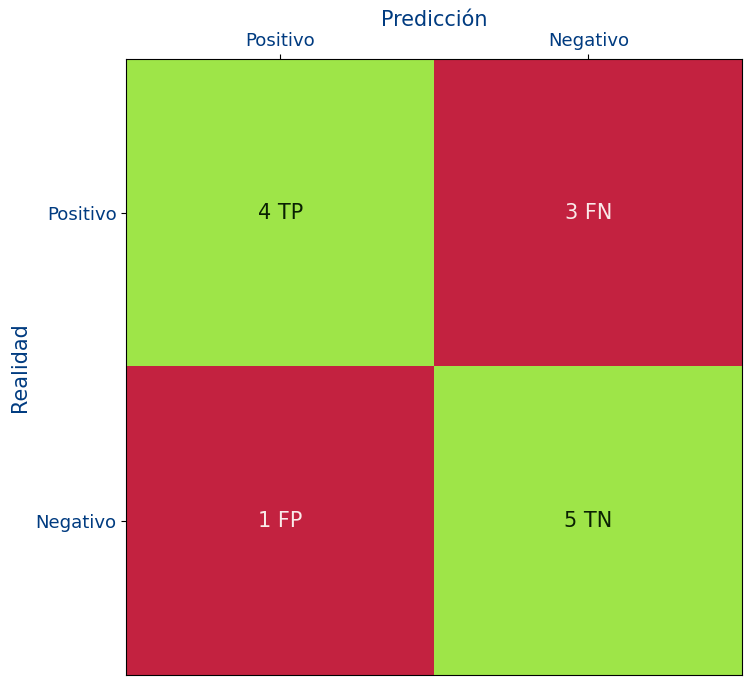

In [22]:
y_true = np.array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
threshold = 0.5


# Calculo de TP, TN, FP, FN
TP = np.sum((y_score > threshold) & (y_true == 1))
TN = np.sum((y_score <= threshold) & (y_true == 0))
FP = np.sum((y_score > threshold) & (y_true == 0))
FN = np.sum((y_score <= threshold) & (y_true == 1))

print(f"Verdaderos Positivos (TP): {TP}")
print(f"Verdaderos Negativos (TN): {TN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

# Dibujo de la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 8))  # Configura el tamaño de la figura

plot_matriz_confusion(
    axes=ax,
    TP=TP, TN=TN, FP=FP, FN=FN,
    fontsize=15
)

# Mostrar el gráfico
plt.show()

#### Ejercicio 2.C Siguiendo con los datos anteriores y suponiendo que el umbral es 0.5:
- **y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])**
- **y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])**
#### Calcula directamente las siguientes métricas:
- Prevalencia
- Sensibilidad
- Especificidad
- VPP
- VPN


In [23]:
# Valores de la matriz de confusión
TP = 4  # Verdaderos Positivos
FN = 3  # Falsos Negativos
FP = 1  # Falsos Positivos
TN = 5  # Verdaderos Negativos

# Cálculo de las métricas
prevalencia = (TP + FN) / (TP + FN + FP + TN)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
VPP = TP / (TP + FP)  # Valor Predictivo Positivo (Precisión)
VPN = TN / (TN + FN)  # Valor Predictivo Negativo

# Mostrar resultados
print(f"Prevalencia: {prevalencia:.4f}")
print(f"Sensibilidad (Recall): {sensibilidad:.4f}")
print(f"Especificidad: {especificidad:.4f}")
print(f"Valor Predictivo Positivo (Precisión): {VPP:.4f}")
print(f"Valor Predictivo Negativo: {VPN:.4f}")

Prevalencia: 0.5385
Sensibilidad (Recall): 0.5714
Especificidad: 0.8333
Valor Predictivo Positivo (Precisión): 0.8000
Valor Predictivo Negativo: 0.6250


#### Ejercicio 3.A  Crea una red neuronal con los datos de bread cancer con las siguientes características:
- neuronas por capa:[30,64,32,16,8,1]
- Función de activation: ELU
- Nº de epocas: 20
- Optimizador: Adam con tasa de aprendizaje de 0,0001
#### Muestra las siguientes métricas durante el entrenamiento (para cada una de las épocas): 
- Loss
- Sensibilidad
- Especificad

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [25]:
# Cargar datos
data = load_breast_cancer()
X, y = data.data, data.target

# Normalización de los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de red neuronal
model = models.Sequential([
    layers.Dense(30, activation="elu", input_shape=(X.shape[1],)),
    layers.Dense(64, activation="elu"),
    layers.Dense(32, activation="elu"),
    layers.Dense(16, activation="elu"),
    layers.Dense(8, activation="elu"),
    layers.Dense(1, activation="sigmoid")  # Salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [27]:
# Función para calcular sensibilidad y especificidad
def sensitivity_specificity(y_true, y_pred):
    y_pred = np.where(y_pred >= 0.5, 1, 0)  # Convertir probabilidades a etiquetas (umbral 0.5)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    
    sensibilidad = TP / (TP + FN) if (TP + FN) > 0 else 0
    especificidad = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    return sensibilidad, especificidad

In [28]:
# Entrenar el modelo y calcular métricas por época
epochs = 20
for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)  # Entrenar 1 época

    # Obtener predicciones
    y_pred_train = model.predict(X_train, verbose=0).flatten()
    
    # Calcular métricas
    sensibilidad, especificidad = sensitivity_specificity(y_train, y_pred_train)
    loss = history.history["loss"][0]
    
    # Mostrar resultados de la época
    print(f"Época {epoch+1}/{epochs} - Loss: {loss:.4f} - Sensibilidad: {sensibilidad:.4f} - Especificidad: {especificidad:.4f}")


Época 1/20 - Loss: 0.6262 - Sensibilidad: 0.8287 - Especificidad: 0.7219
Época 2/20 - Loss: 0.5076 - Sensibilidad: 0.8986 - Especificidad: 0.7988
Época 3/20 - Loss: 0.4242 - Sensibilidad: 0.9231 - Especificidad: 0.8402
Época 4/20 - Loss: 0.3648 - Sensibilidad: 0.9336 - Especificidad: 0.8639
Época 5/20 - Loss: 0.3220 - Sensibilidad: 0.9336 - Especificidad: 0.9053
Época 6/20 - Loss: 0.2892 - Sensibilidad: 0.9371 - Especificidad: 0.9112
Época 7/20 - Loss: 0.2633 - Sensibilidad: 0.9406 - Especificidad: 0.9053
Época 8/20 - Loss: 0.2416 - Sensibilidad: 0.9406 - Especificidad: 0.9290
Época 9/20 - Loss: 0.2234 - Sensibilidad: 0.9476 - Especificidad: 0.9349
Época 10/20 - Loss: 0.2079 - Sensibilidad: 0.9510 - Especificidad: 0.9408
Época 11/20 - Loss: 0.1942 - Sensibilidad: 0.9510 - Especificidad: 0.9408
Época 12/20 - Loss: 0.1820 - Sensibilidad: 0.9580 - Especificidad: 0.9467
Época 13/20 - Loss: 0.1705 - Sensibilidad: 0.9650 - Especificidad: 0.9467
Época 14/20 - Loss: 0.1610 - Sensibilidad: 0.96

#### Ejercicio 3.B 

#### En este ejercicio vamos a mostrar la matriz de confusión de la red que acabamos de crear.

#### Para ello vamos a usar los valores de test que los tenemos en las siguientes variables del ejercicio anterior:

- x_test
- y_test

#### La variable y_test es lo que llamamos y_true mientras que con x_test obtendremos y_score.

#### Para ello sigue los siguientes pasos:

- Crea una función llamada get_matriz_confusion(y_true,y_score,threshold) que retorne TP ,TN, FP y FN
- Calcula y_score usando el método predict del modelo y usando la variable x_test
- Haz que y_true sea igual a y_test
- Llama a la función get_matriz_confusion
- Muestra la matriz de confusión

